<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_2_BonusAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv('train_and_test2.csv')
print("Original Data:")
print(df.head())

Original Data:
   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0     

Missing Values Before Cleaning:
 Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

Missing Values After Cleaning:
 Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zer

<ipython-input-6-3f633452a7e1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


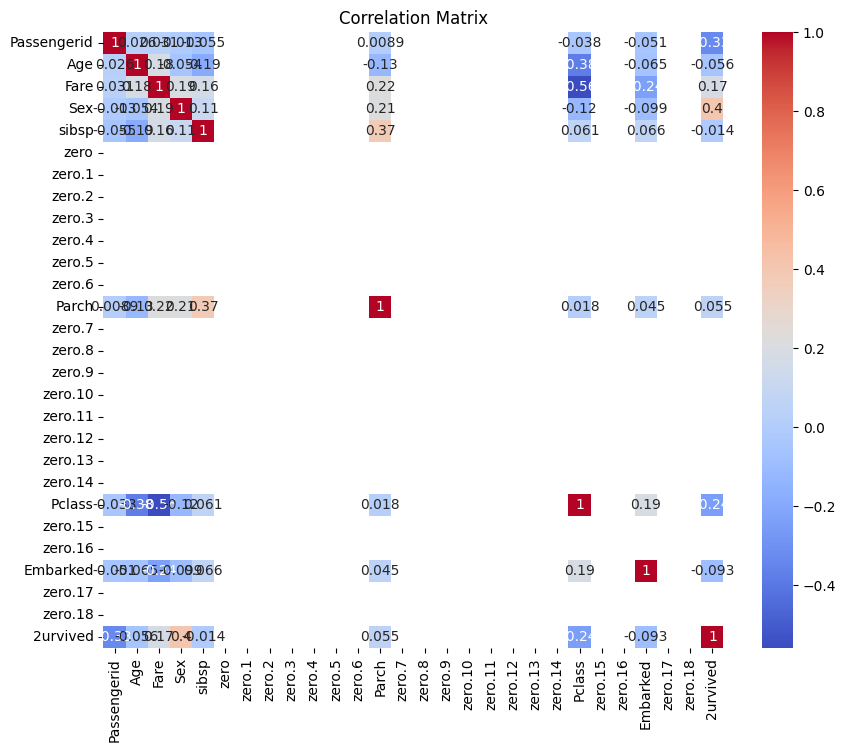

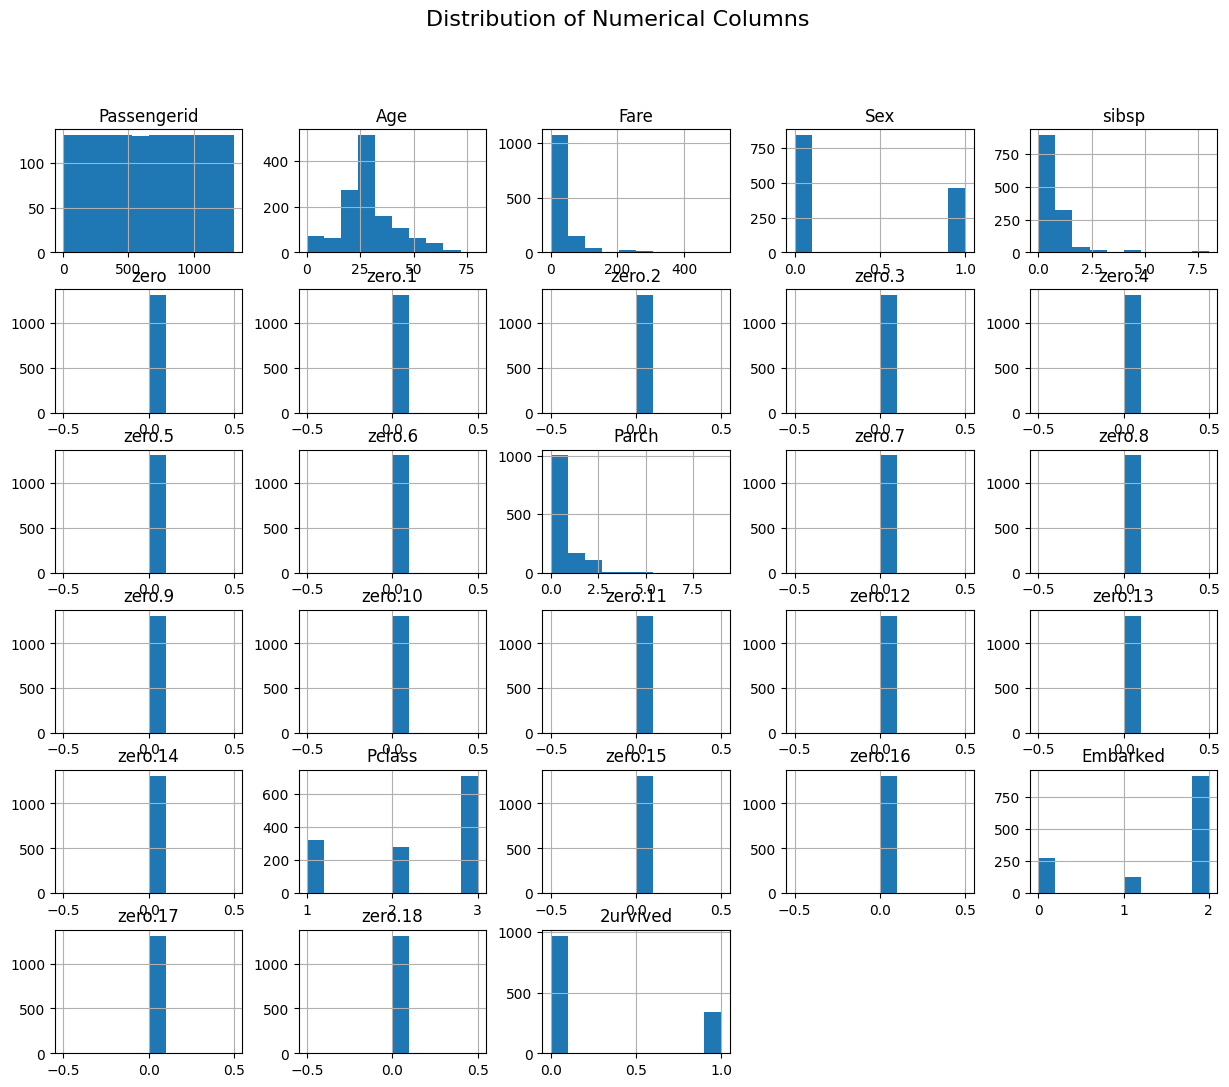

<Figure size 1200x1000 with 0 Axes>

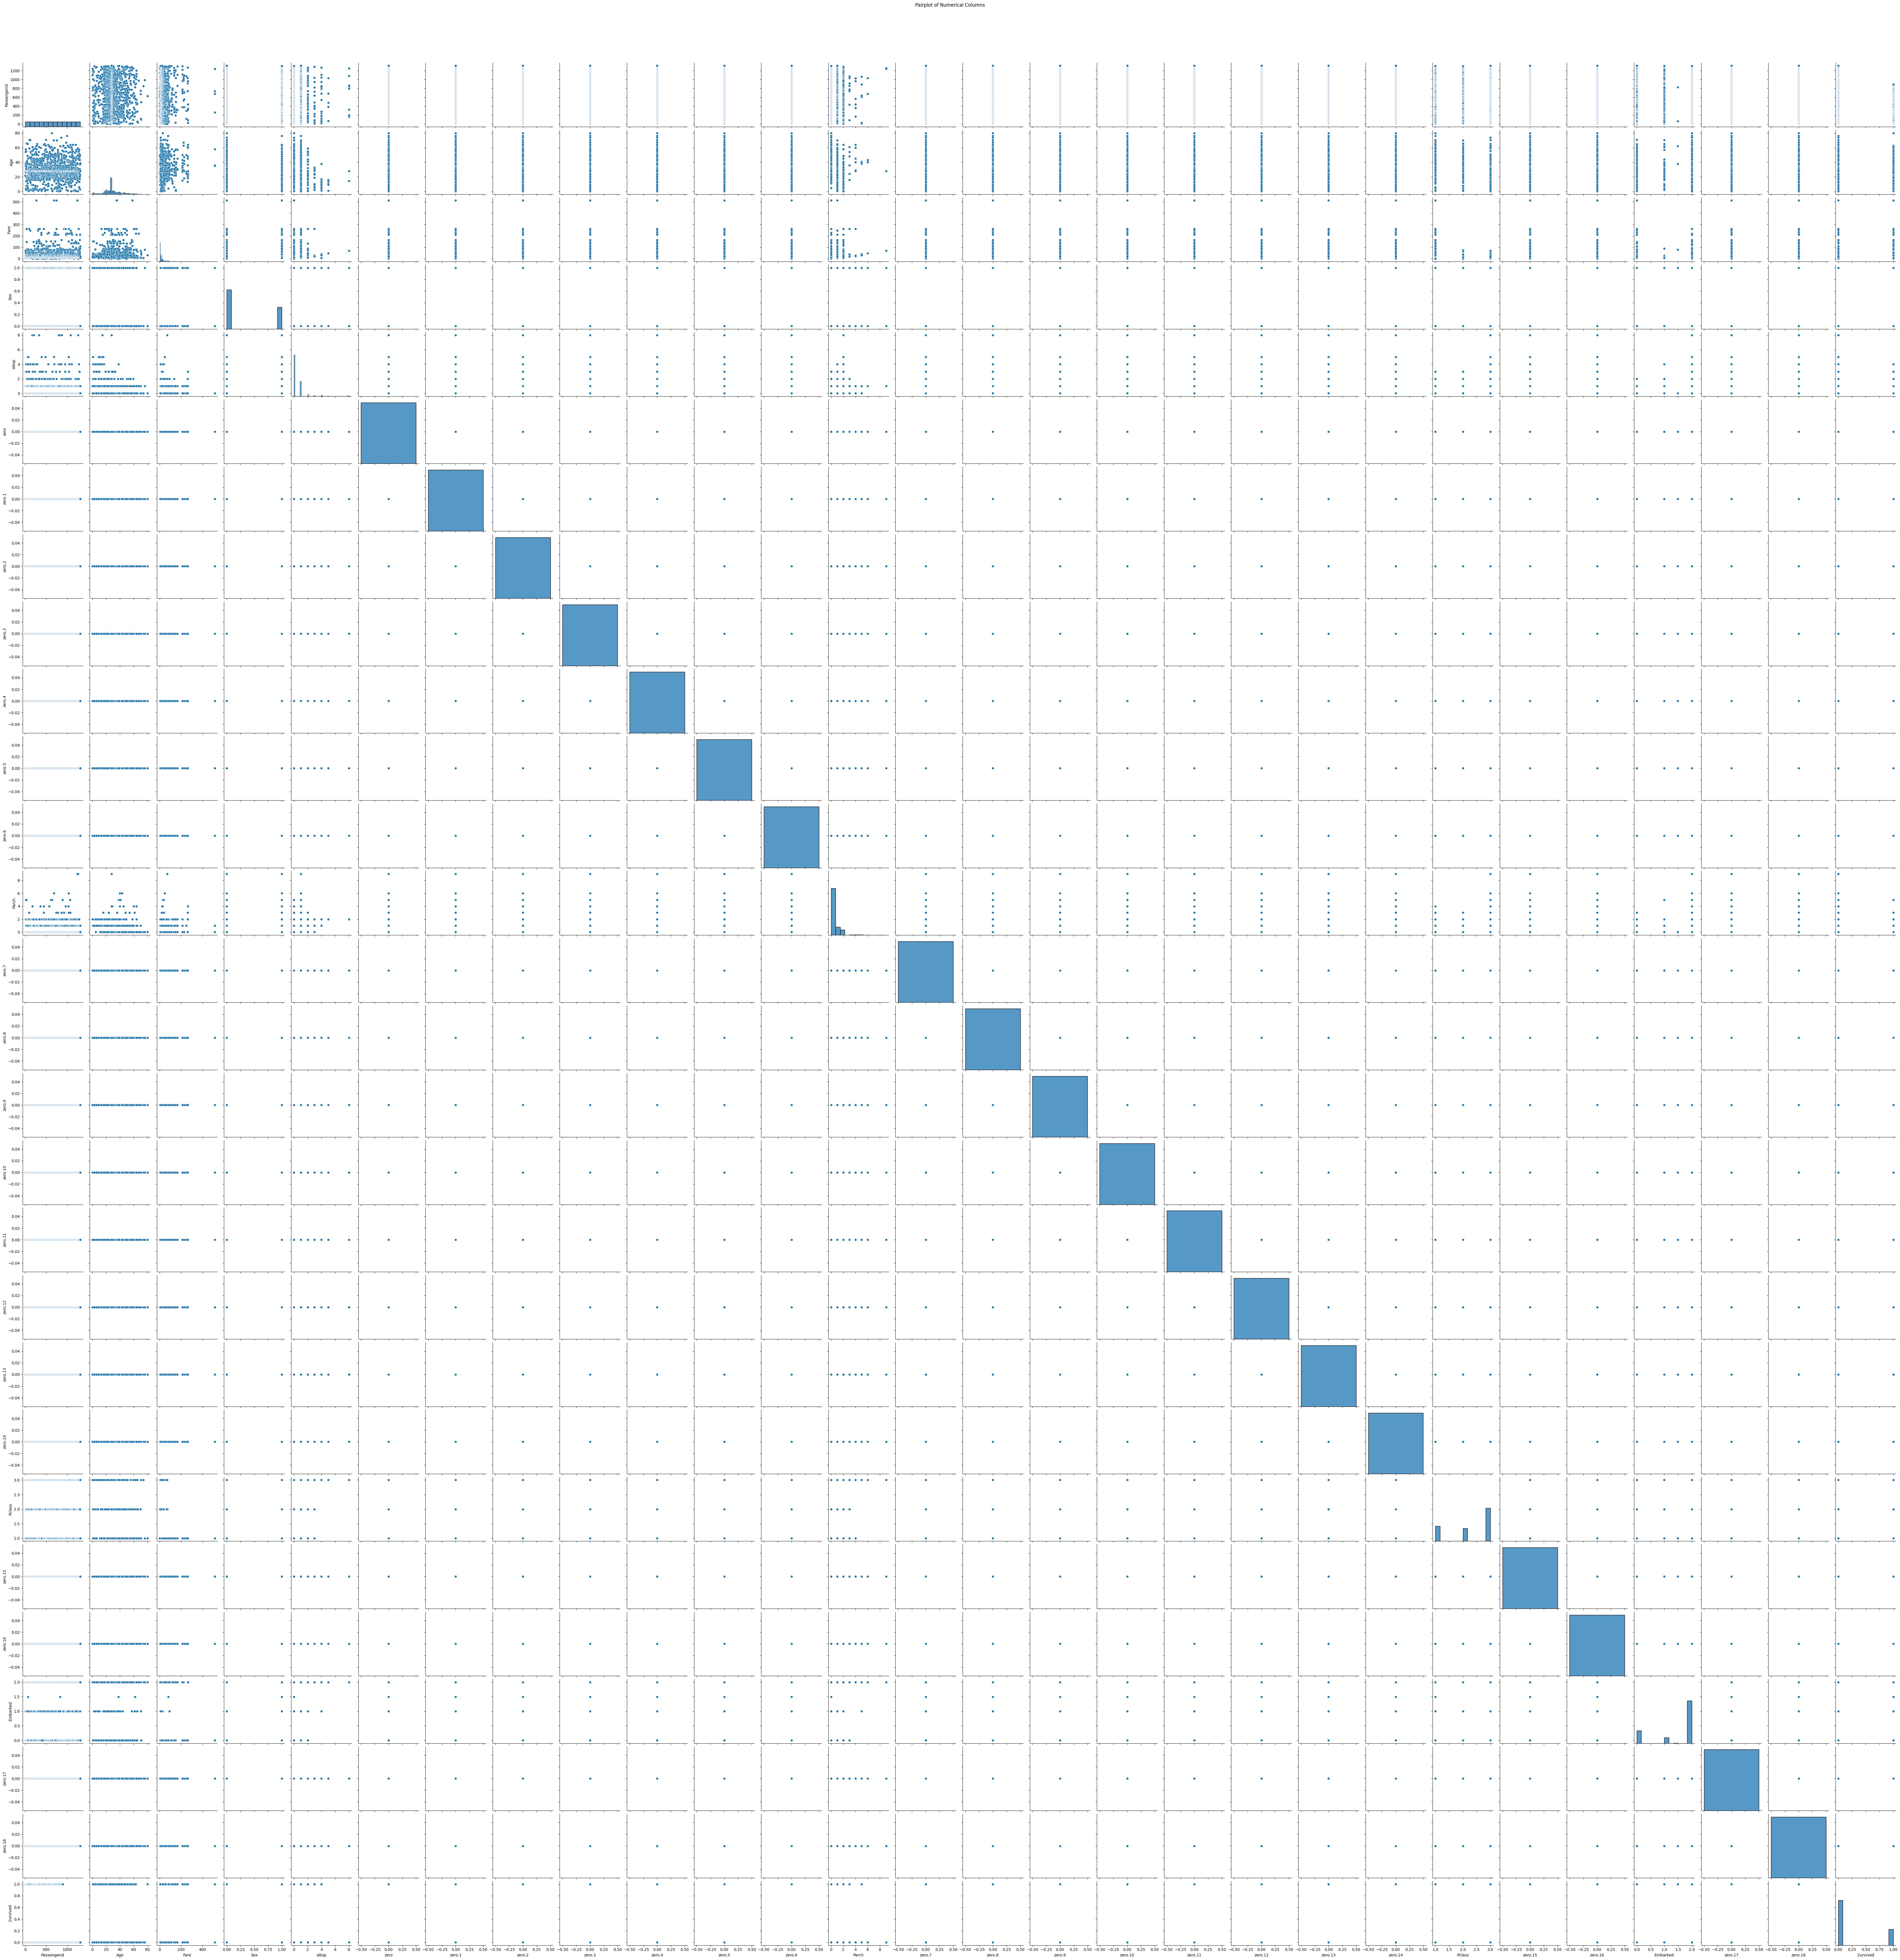

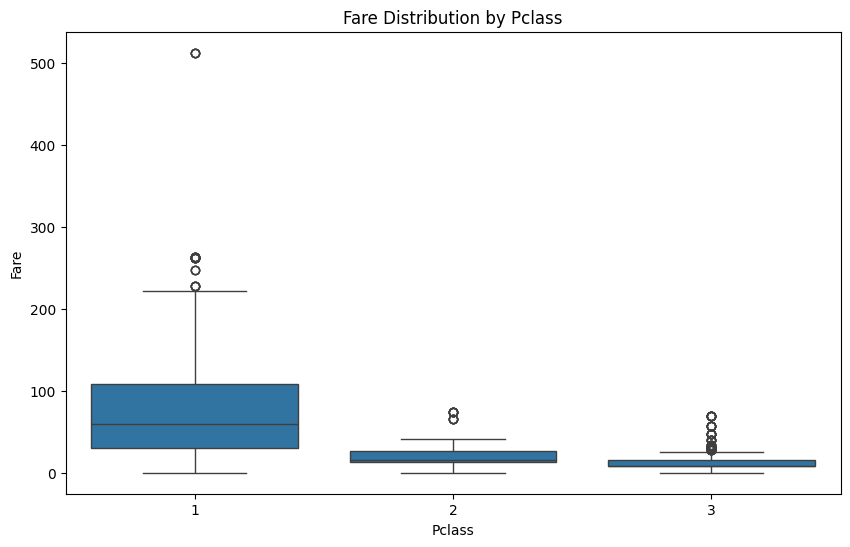


Cleaned data exported to cleaned_train_and_test2.csv


In [6]:
def process_and_analyze_data(input_file, output_file):
    """
    Imports data, cleans it, performs EDA, and exports cleaned data.
    """
    try:
        df = pd.read_csv(input_file)

        print("Missing Values Before Cleaning:\n", df.isnull().sum())

        for col in df.select_dtypes(include=np.number).columns:
            df[col].fillna(df[col].mean(), inplace=True)

        for col in df.select_dtypes(exclude=np.number).columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

        print("\nMissing Values After Cleaning:\n", df.isnull().sum())

        numerical_cols = df.select_dtypes(include=np.number).columns
        correlation_matrix = df[numerical_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title("Correlation Matrix")
        plt.savefig("correlation_matrix.png")
        plt.show()

        df[numerical_cols].hist(figsize=(15, 12))
        plt.suptitle("Distribution of Numerical Columns", fontsize=16)
        plt.savefig("numerical_distribution.png")
        plt.show()

        categorical_cols = df.select_dtypes(exclude=np.number).columns
        for col in categorical_cols:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, data=df)
            plt.title(f"Distribution of {col}")
            plt.xticks(rotation=45, ha='right')
            plt.savefig(f"{col}_distribution.png")
            plt.show()

        if 'Survived' in df.columns and 'Age' in df.columns:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='Survived', y='Age', data=df)
            plt.title("Age Distribution by Survival")
            plt.savefig("age_survival_boxplot.png")
            plt.show()


        if len(numerical_cols) > 1:
            plt.figure(figsize=(12, 10))
            sns.pairplot(df[numerical_cols])
            plt.suptitle("Pairplot of Numerical Columns", y=1.02)
            plt.savefig("pairplot.png")
            plt.show()


        if 'Fare' in df.columns and 'Pclass' in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='Pclass', y='Fare', data=df)
            plt.title("Fare Distribution by Pclass")
            plt.savefig("fare_pclass_boxplot.png")
            plt.show()


        if 'Survived' in df.columns and 'Sex' in df.columns:
            plt.figure(figsize=(8, 6))
            sns.countplot(x='Sex', hue='Survived', data=df)
            plt.title("Survival Count by Sex")
            plt.savefig("survival_sex_countplot.png")
            plt.show()

        df.to_csv(output_file, index=False)
        print(f"\nCleaned data exported to {output_file}")

    except FileNotFoundError:
        print(f"Error: Input file '{input_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

input_csv = 'train_and_test2.csv'
output_csv = 'cleaned_train_and_test2.csv'

process_and_analyze_data(input_csv, output_csv)